In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.stats import norm 
from datetime import datetime, time
import pandas_datareader.data as pdr
import yfinance as yf

/Users/shalini/workspace/option-pricing/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
import math
%run -i volatility.py

Stock data

In [4]:
ticker = 'NVDA'


In [5]:
today = datetime.now().date()
one_year_ago = today.replace(year = today.year-5)

In [6]:
stock = yf.Ticker(ticker)
df = yf.download(ticker,start = one_year_ago, end = today,rounding = True)

[*********************100%%**********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-05,4.32,4.50,4.32,4.49,4.47,695676000
2019-09-06,4.47,4.53,4.43,4.47,4.45,376976000
2019-09-09,4.50,4.60,4.50,4.51,4.49,417524000
2019-09-10,4.48,4.61,4.47,4.58,4.56,352812000
2019-09-11,4.59,4.66,4.57,4.61,4.59,361512000


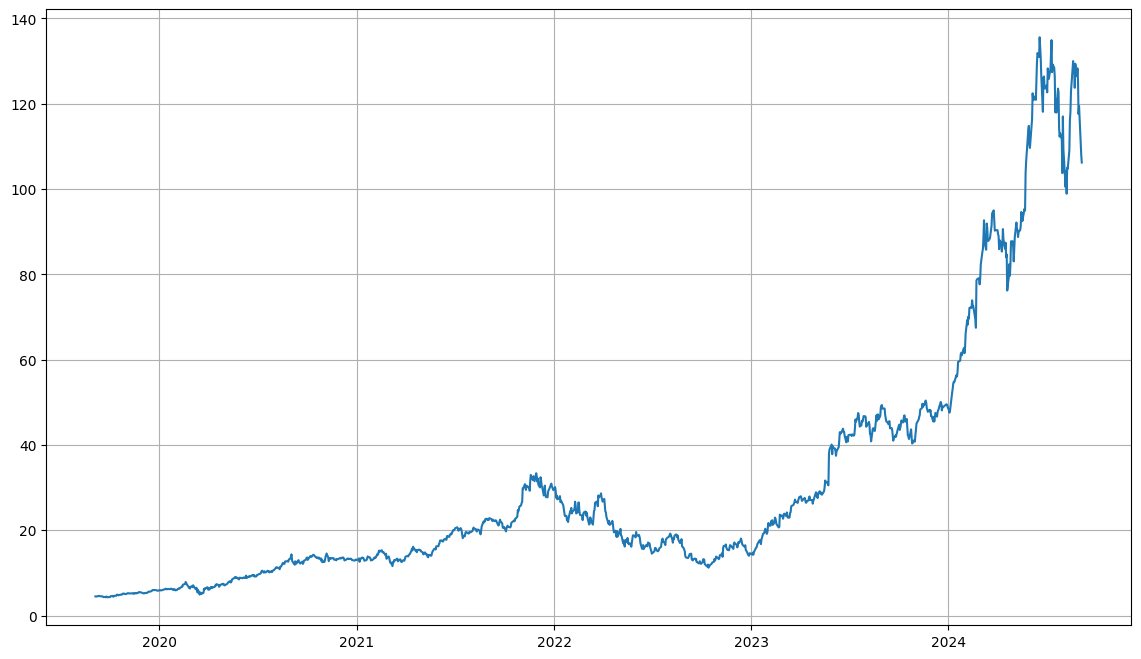

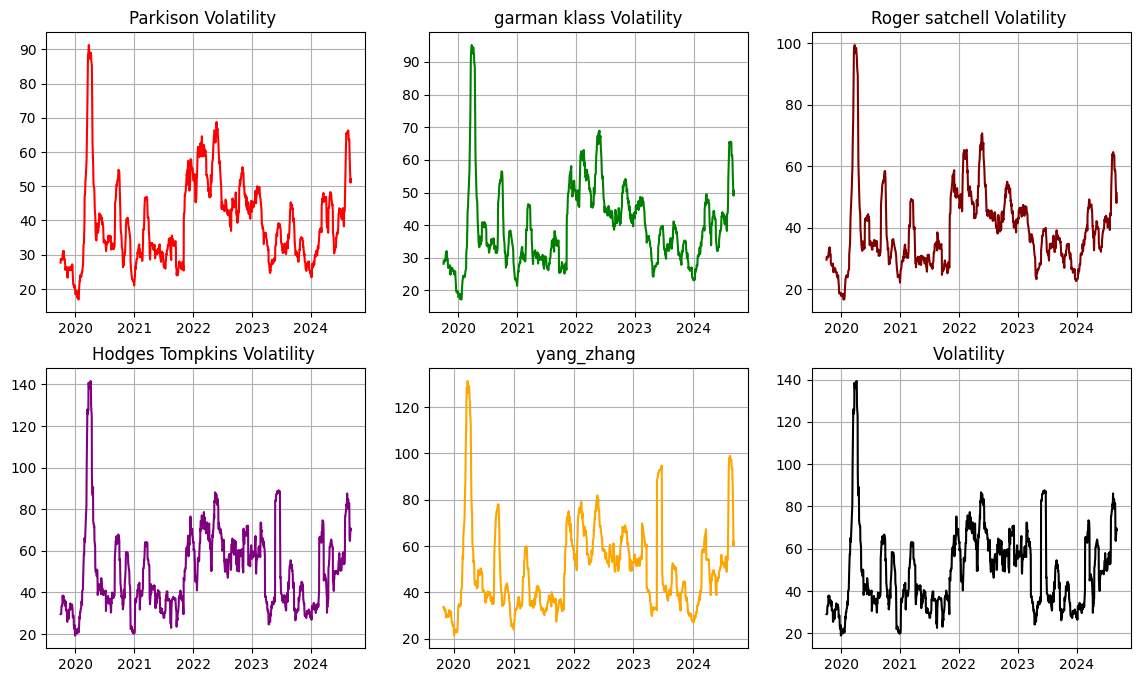

In [16]:

plt.figure(figsize=(14,8))
plt.plot(df['Close'])
plt.grid()

fig, axs = plt.subplots(2,3, figsize = (14,8))
axs[0,0].plot( parkison_vol(df)*100, color = 'red' )
axs[0,0].set_title('Parkison Volatility ')
axs[0,0].grid()

axs[0,1].plot(garman_klass(df)*100, color = 'green')
axs[0,1].set_title('garman klass Volatility')
axs[0,1].grid()

axs[0,2].plot( rogers_satchell(df)*100, color = 'maroon')
axs[0,2].set_title('Roger satchell Volatility ')
axs[0,2].grid()

axs[1,0].plot( hodges_tompkins(df)*100,  color = 'purple')
axs[1,0].set_title('Hodges Tompkins Volatility ')
axs[1,0].grid()

axs[1,1].plot(  yang_zhang(df)*100,  color = 'orange')
axs[1,1].set_title('yang_zhang ')
axs[1,1].grid()

axs[1,2].plot( std_dev(df)*100, color = 'black')
axs[1,2].set_title('Volatility ')
axs[1,2].grid()
plt.show()